In [ ]:
!cp /content/drive/MyDrive/sipakmed/modular/libraries.py /content
import libraries


In [ ]:
!pip install torchviz
!pip install torchsummary
!apt-get install graphviz -y
!pip install graphviz
!pip install Pillow
from torchviz import make_dot


In [ ]:

# Define the data path
DATA_PATH = '/content/drive/MyDrive/sipakmed/sipakmed/'

here i used code to create out_dir and copy files, and splitting dataset with 60% for training Test: 20%
Validation: 20%

In [ ]:
# Import the module
!cp /content/drive/MyDrive/sipakmed/modular/dataset_management.py /content

import dataset_management
import os


i used this to make sure there isn't duplicated data and data for training was succesful

i used this to check now how many files i have knowing that my data for sipakmed originally were 4049 bmb files

In [ ]:
# Get a list of all image file paths
file_paths = []
categories = []

for root, dirs, files in os.walk(DATA_PATH):
    for file in files:
        if file.endswith('.bmp'):
            file_path = os.path.join(root, file)
            file_paths.append(file_path)
            if 'normal' in file_path:
                categories.append(0)
            else:
                categories.append(1)

In [ ]:
import libraries
df = libraries.pd.DataFrame({'filename (X)': file_paths, 'category (Y)': categories})
df

In [ ]:

# Specify the path to your dataset on Google Drive
drive_path = '/content/drive/MyDrive/sipakmed/sipakmed/'

# Define the output directory for your divided dataset on Google Drive
output_dir = '/content/drive/MyDrive/sipakmed/sipakmed/sipakmed_training'

source_directory = '/content/drive/My Drive/sipakmed/modular'



Directory: /content/drive/MyDrive/sipakmed/sipakmed/sipakmed_training/, BMP File Count: 5886
Directory: /content/drive/MyDrive/sipakmed/sipakmed/, BMP File Count: 11772
Total BMP File Count in '/content/drive/MyDrive/sipakmed/sipakmed/': 11772
Total BMP File Count in '/content/drive/MyDrive/sipakmed/sipakmed/sipakmed_training/': 5886


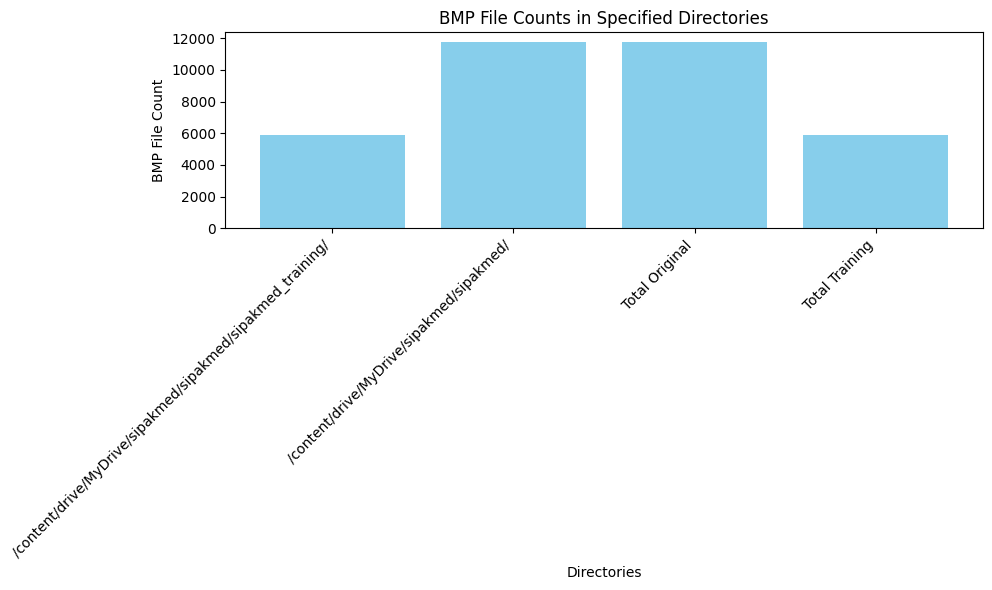

In [ ]:
import sys
sys.path.append('/content/drive/My Drive/sipakmed/modular')

import check_balanced_data
check_balanced_data.check_balanced_data()


to check if my data are balanced regarding the training ones or not

data balance in normal and atypical

In [ ]:
import random
import dataset_management
# Function to balance data by randomly undersampling the majority class
def balance_data(train_files):
    normal_files = [file for file in train_files if 'normal' in file]
    atypical_files = [file for file in train_files if 'atypical' in file]

    min_samples = min(len(normal_files), len(atypical_files))

    balanced_data = random.sample(normal_files, min_samples) + random.sample(atypical_files, min_samples)
    return balanced_data

In [ ]:
def check_balance(data):
    normal_count = sum(1 for file in data if 'normal' in file)
    atypical_count = sum(1 for file in data if 'atypical' in file)

    return normal_count, atypical_count
# Call the balance_data function to get the balanced dataset
balanced_train_data = balance_data(train_files)

# Check the balance
normal_count, atypical_count = check_balance(balanced_train_data)
print(f"Normal samples: {normal_count}, Atypical samples: {atypical_count}")

if normal_count == atypical_count:
    print("The data is balanced.")
else:
    print("The data is not balanced.")


Normal samples: 2179, Atypical samples: 2179
The data is balanced.


plotting some sample data

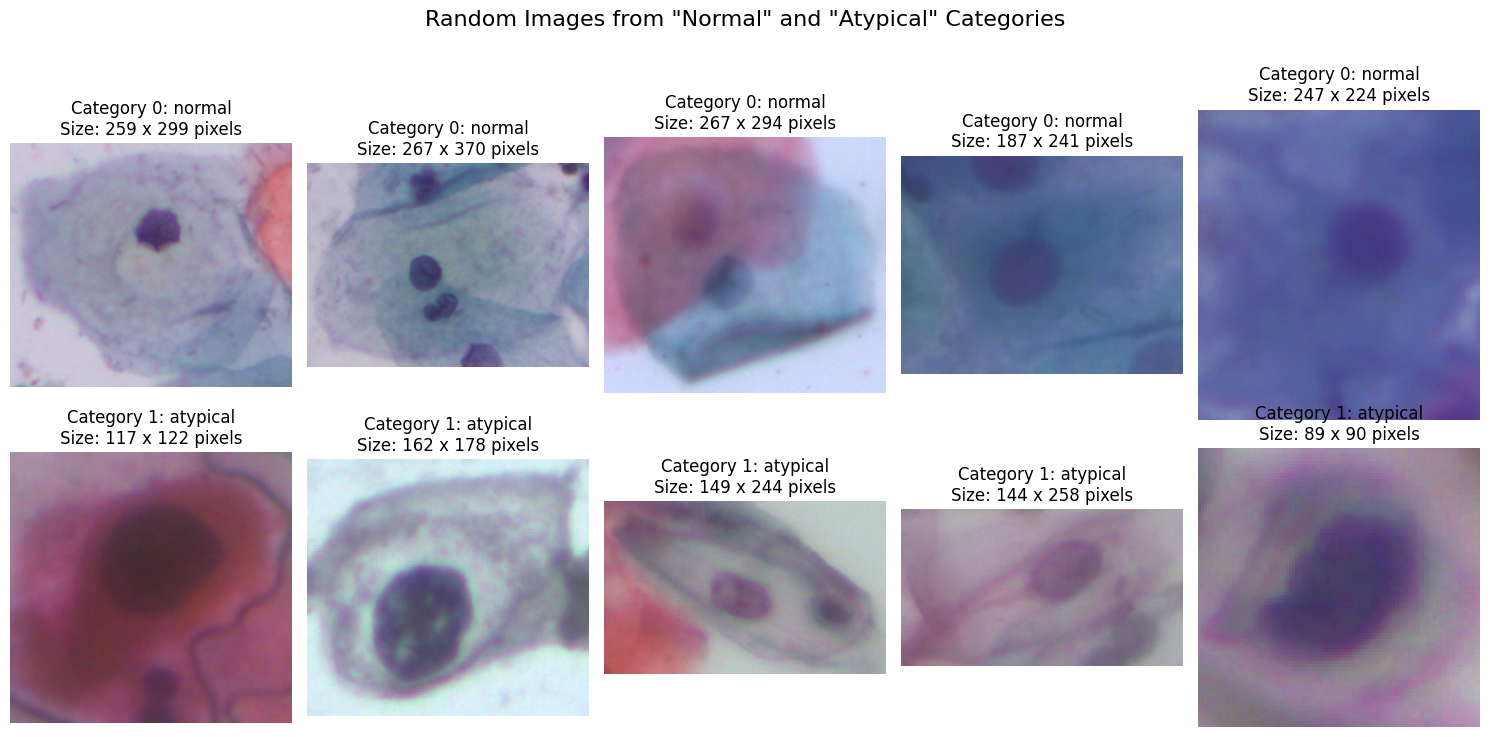

In [ ]:
import libraries
import matplotlib.pyplot as plt

# Set the paths for 'normal' and 'atypical' categories
normal_path = '/content/drive/MyDrive/sipakmed/sipakmed/normal'
atypical_path = '/content/drive/MyDrive/sipakmed/sipakmed/atypical'

# Get a list of all image file paths for 'normal' category
normal_file_paths = [os.path.join(normal_path, root, file)
                     for root, dirs, files in os.walk(normal_path)
                     for file in files if file.endswith('.bmp')]

# Get a list of all image file paths for 'atypical' category
atypical_file_paths = [os.path.join(atypical_path, root, file)
                       for root, dirs, files in os.walk(atypical_path)
                       for file in files if file.endswith('.bmp')]

# Combine the two lists of file paths
file_paths = normal_file_paths + atypical_file_paths

# Create corresponding categories (0 for 'normal', 1 for 'atypical')
categories = [0] * len(normal_file_paths) + [1] * len(atypical_file_paths)

# Create a DataFrame
df = libraries.pd.DataFrame({'filename (X)': file_paths, 'category (Y)': categories})

# Define the number of random images to display from each category
num_images_per_category = 5

# Group DataFrame by category
grouped_df = df.groupby('category (Y)')

# Create a subplot with the desired number of rows and columns
num_categories = len(grouped_df)
fig, axes = plt.subplots(num_categories, num_images_per_category, figsize=(15, 8))

# Flatten the 2D array of subplots
axes = axes.flatten()
# Add a title to the entire plot
plt.suptitle('Random Images from "Normal" and "Atypical" Categories', fontsize=16)
# Iterate through each category
for i, (category, group) in enumerate(grouped_df):
    # Select random images from the category
    random_images = group.sample(num_images_per_category)

    # Iterate through each random image in the category
    for j, (_, row) in enumerate(random_images.iterrows()):
        # Load and display the image with error handling
        img_path = row['filename (X)']
        try:
            img = libraries.mpimg.imread(img_path)
        except (OSError, ValueError, FileNotFoundError, TypeError) as e:
            print(f"Error loading image at {img_path}: {e}")
            continue

        # Set the title to the category and image size
        title = f'Category {category}: {"normal" if category == 0 else "atypical"}\nSize: {img.shape[0]} x {img.shape[1]} pixels'
        axes[i * num_images_per_category + j].set_title(title)

        # Display the image
        axes[i * num_images_per_category + j].imshow(img)
        axes[i * num_images_per_category + j].axis('off')

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()


Data preprocessing and loading using torchvision


 load images and their labels from the balanced_dataset:

In [ ]:
!cp /content/drive/MyDrive/sipakmed/modular/data_loading.py /content
import data_loading

Do you want to apply data processing? (y/n): n
Data processing skipped.
Number of images in 'normal' class: 1159
Number of images in 'atypical' class: 1005


defining model architicture



In [ ]:
import libraries
from torchvision.models import mobilenet_v3_small

# Model
class MobileNetV3Small(libraries.nn.Module):
    def __init__(self, num_classes=2):
        super(MobileNetV3Small, self).__init__()
        self.model = libraries.mobilenet_v3_small(pretrained=True)
        in_features = self.model.classifier[3].in_features
        self.model.classifier[3] = libraries.nn.Linear(in_features, num_classes)

    def forward(self, x):
        return self.model(x)

# Dataset
class PTImageDataset(libraries.Dataset):
    def __init__(self, data_dir):
        self.data_dir = data_dir
        self.files = self.get_files(data_dir)
        self.num_classes = 2  # Assuming you have 2 classes
        self.class_names = ["normal", "abnormal"]

    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx):
        img_path = self.files[idx]
        img_tensor = libraries.torch.load(img_path)
        # Extract label from the file path or filename
        label = self.extract_label(img_path)

        return img_tensor, label

    def extract_label(self, file_path):
        # Modify this logic based on your actual file naming or directory structure
        parts = file_path.split(libraries.os.path.sep)
        class_name = parts[-2]
        return 0 if class_name == "normal" else 1  # Adjust based on your class names

    def get_files(self, data_dir):
        all_files = []
        for root, dirs, files in libraries.os.walk(data_dir):
            for file in files:
                if file.endswith(".pt"):
                    all_files.append(libraries.os.path.join(root, file))
        return all_files


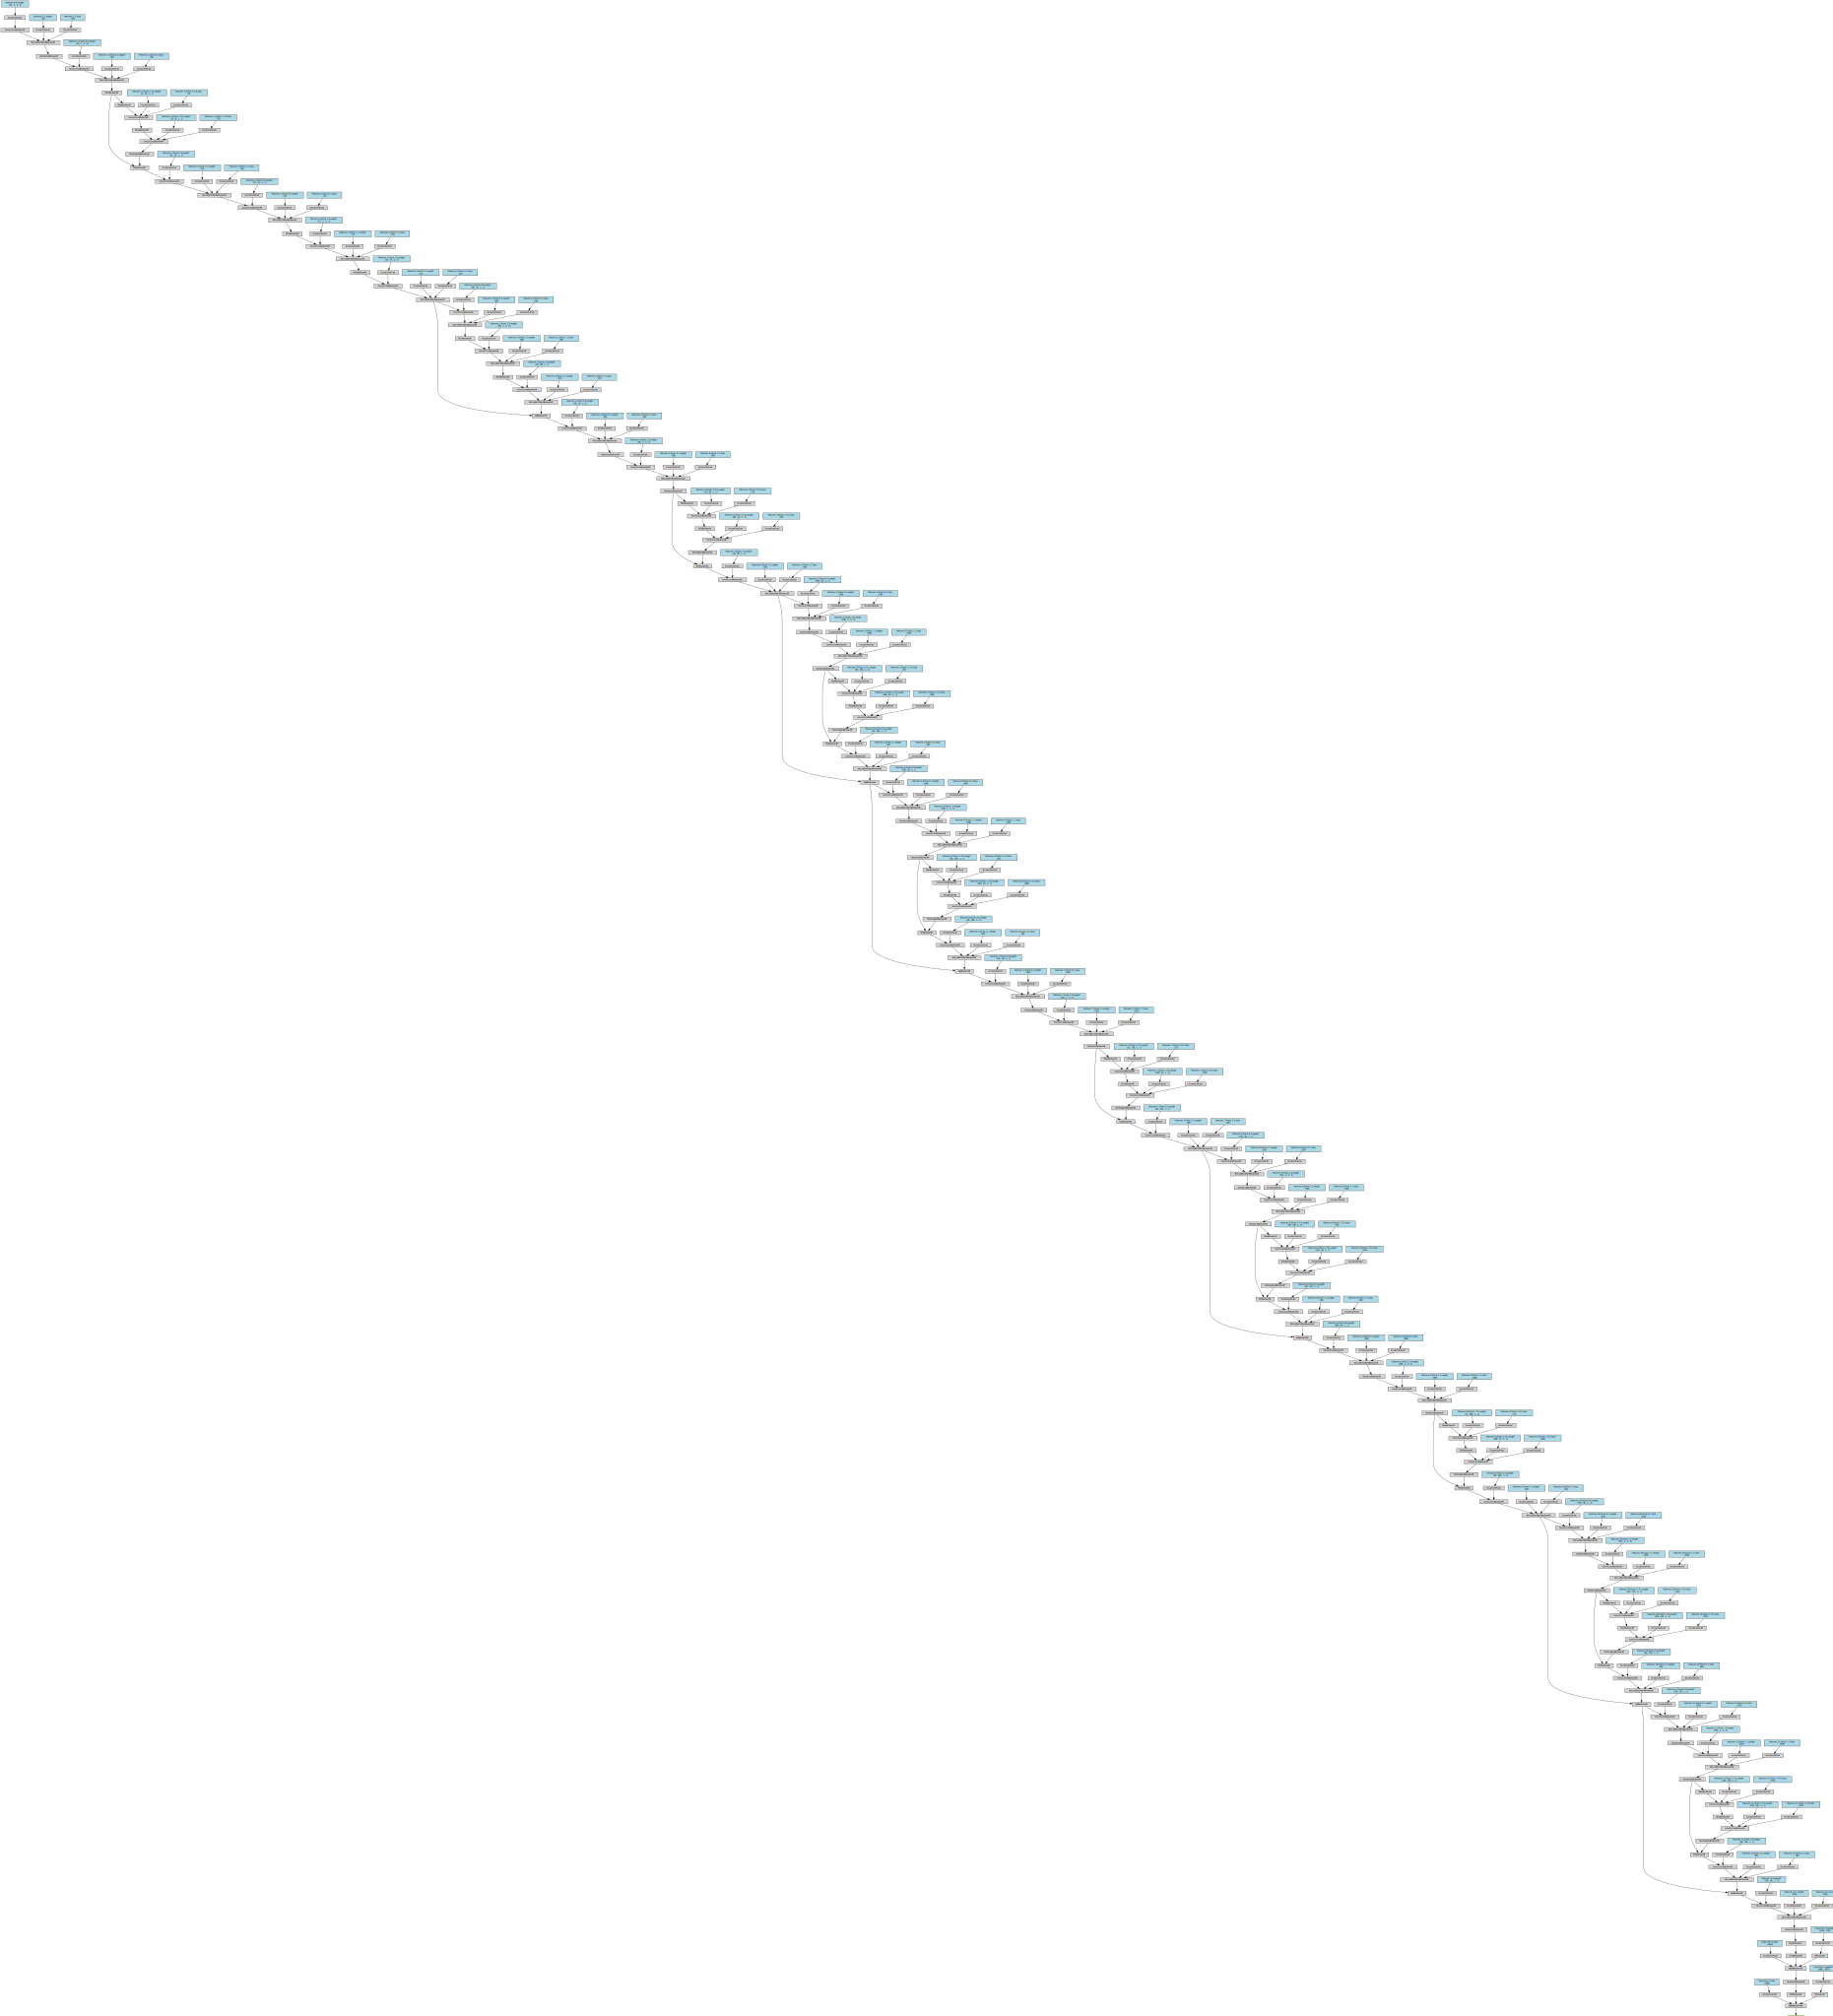

In [ ]:
from torchvision.models import mobilenet_v3_small

# Create a dummy input
dummy_input = libraries.torch.randn(1, 3, 125, 125)

# Load the model
model = mobilenet_v3_small()

# Visualize the architecture using torchviz
make_dot(model(dummy_input), params=dict(model.named_parameters()))



I saved the photo to use it later in my thesis document

In [ ]:
import libraries
from torchvision.models import mobilenet_v3_small

# Load MobileNetV3-Small
model = mobilenet_v3_small(pretrained=True)

# Extract only the classifier (fully connected) layer
classifier = model.classifier

# Create dummy input
dummy_input = libraries.torch.randn(1, 576)  # Adjust the input size based on your model

# Visualize just the classifier layer
make_dot(classifier(dummy_input), params=dict(classifier.named_parameters())).render("mobilenetv3_small_classifier_viz", format="png")
from google.colab import files
files.download('mobilenetv3_small_classifier_viz.png')


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Training function
def train(model, train_loader, criterion, optimizer):
    model.train()
    epoch_loss = 0
    epoch_acc = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item() * inputs.size(0)
        _, predicted = libraries.torch.max(outputs.data, 1)
        total = labels.size(0)
        correct = (predicted == labels).sum().item()
        epoch_acc += correct / total

    epoch_loss /= len(train_loader.dataset)
    epoch_acc /= len(train_loader.dataset)

    return epoch_loss, epoch_acc

# Placeholder for the test function
def test(model, test_loader, criterion):
    model.eval()
    epoch_loss = 0
    epoch_acc = 0
    all_preds = []
    all_labels = []

    with libraries.torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)

            epoch_loss += criterion(outputs, labels).item() * inputs.size(0)
            _, predicted = libraries.torch.max(outputs.data, 1)
            total = labels.size(0)
            correct = (predicted == labels).sum().item()
            epoch_acc += correct

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    epoch_loss /= len(test_loader.dataset)
    epoch_acc /= len(test_loader.dataset)

    return epoch_loss, epoch_acc, all_preds, all_labels

# Dataset and dataloaders
PREPROCESSED_PATH = "/content/drive/MyDrive/sipakmed/sipakmed/sipakmed_training/preprocessed_classified/"
dataset = PTImageDataset(PREPROCESSED_PATH)
total_size = len(dataset)
train_size = int(0.6 * total_size)
val_size = int(0.2 * total_size)
test_size = total_size - train_size - val_size

train_dataset, val_dataset, test_dataset = libraries.random_split(dataset, [train_size, val_size, test_size])

train_loader = libraries.DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = libraries.DataLoader(val_dataset, batch_size=16, shuffle=False)
test_loader = libraries.DataLoader(test_dataset, batch_size=16, shuffle=False)


In [ ]:

from torchvision.models import mobilenet_v3_small

# Model, optimizer, loss
device = libraries.torch.device("cuda" if libraries.torch.cuda.is_available() else "cpu")
model = MobileNetV3Small().to(device)
optimizer = libraries.optim.Adam(model.parameters(), lr=0.0001)
criterion = libraries.nn.CrossEntropyLoss()

# Check if a pre-trained model should be loaded
load_pretrained = input("Do you want to load a pre-trained model? (yes/no): ").lower()

if load_pretrained == "yes":
    # Check if a previously saved model exists
    saved_model_path = "mobilenetv3_adam0.0001_small.pth"  # Adjust the filename as needed
    if os.path.exists(saved_model_path):
        model = MobileNetV3Small().to(device)
        model.load_state_dict(libraries.torch.load(saved_model_path))
        print("Pre-trained model loaded.")
    else:
        print(f"No pre-trained model found at {saved_model_path}. Training a new model.")
        load_pretrained = "no"

if load_pretrained != "yes":
    # Training loop
    train_losses = []
    train_accuracies = []
    validation_losses = []
    validation_accuracies = []

    # Early stopping
    patience = 5
    best_val_loss = float('inf')  # Initialize here
    epochs_no_improve = 0

    for epoch in range(50):
        # Training
        train_loss, train_acc = train(model, train_loader, criterion, optimizer)
        # Validation
        val_loss, val_acc, _, _ = test(model, val_loader, criterion)

        print(f"Epoch {epoch + 1} - "
              f"Train Loss: {train_loss:.4f} Train Acc: {train_acc:.4f} "
              f"Validation Loss: {val_loss:.4f} Validation Acc: {val_acc:.4f}")
        # Append metrics for later plotting
        train_losses.append(train_loss)
        train_accuracies.append(train_acc)
        validation_losses.append(val_loss)
        validation_accuracies.append(val_acc)
        # Early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1
        if epochs_no_improve == patience:
            print("Early stopping!")
            break
    # Testing
    test_loss, test_acc, test_preds, test_labels = test(model, test_loader, criterion)
    print(f"Final Test Loss: {test_loss:.4f} Test Acc: {test_acc:.4f}")

Do you want to load a pre-trained model? (yes/no): n
Epoch 1 - Train Loss: 0.4170 Train Acc: 0.0509 Validation Loss: 0.4201 Validation Acc: 0.8356
Epoch 2 - Train Loss: 0.2117 Train Acc: 0.0578 Validation Loss: 0.2172 Validation Acc: 0.9352
Epoch 3 - Train Loss: 0.1478 Train Acc: 0.0594 Validation Loss: 0.1919 Validation Acc: 0.9352
Epoch 4 - Train Loss: 0.1106 Train Acc: 0.0605 Validation Loss: 0.1687 Validation Acc: 0.9491
Epoch 5 - Train Loss: 0.0993 Train Acc: 0.0606 Validation Loss: 0.1493 Validation Acc: 0.9468
Epoch 6 - Train Loss: 0.0631 Train Acc: 0.0615 Validation Loss: 0.1701 Validation Acc: 0.9398
Epoch 7 - Train Loss: 0.0734 Train Acc: 0.0612 Validation Loss: 0.2059 Validation Acc: 0.9306
Epoch 8 - Train Loss: 0.0549 Train Acc: 0.0620 Validation Loss: 0.1318 Validation Acc: 0.9606
Epoch 9 - Train Loss: 0.0328 Train Acc: 0.0626 Validation Loss: 0.1556 Validation Acc: 0.9560
Epoch 10 - Train Loss: 0.0384 Train Acc: 0.0625 Validation Loss: 0.1505 Validation Acc: 0.9537
Epoch 

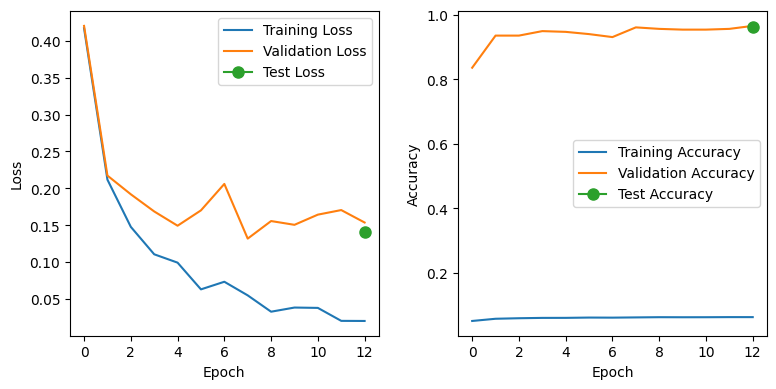

In [ ]:
!cp /content/drive/MyDrive/sipakmed/modular/acc_loss_curves.py /content
import acc_loss_curves

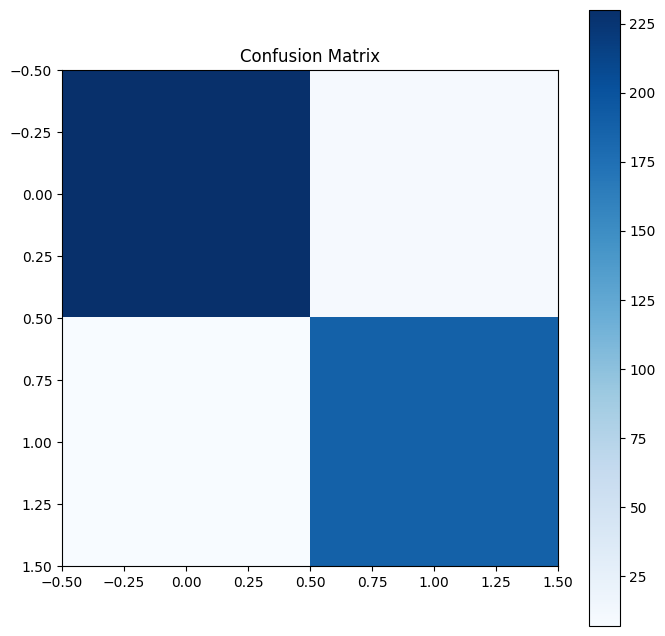

In [ ]:
!cp /content/drive/MyDrive/sipakmed/modular/confusion_matrix.py /content
import confusion_matrix

In [ ]:
!cp /content/drive/MyDrive/sipakmed/modular/evaluation_metrics.py /content
import evaluation_metrics


F1 Score: 0.9632
Precision: 0.9632
Recall: 0.9631
Classification Report:
               precision    recall  f1-score   support

      normal       0.97      0.96      0.97       239
    abnormal       0.95      0.96      0.96       195

    accuracy                           0.96       434
   macro avg       0.96      0.96      0.96       434
weighted avg       0.96      0.96      0.96       434

Do you want to save the trained model? (yes/no): y


*italicized text* **Evaluation Metrics**:
 - F1 Score (0.9561): A balanced measure of precision and recall.
 - Precision (0.9572): The accuracy of positive predictions.
 - Recall (0.9562): The ability to identify all relevant instances.
 - Classification Report: Detailed metrics for each class ("normal" and "abnormal").
   - For "normal": High precision (few false positives), moderate recall.
   - For "abnormal": Good precision, very high recall (few false negatives).
 - Accuracy (0.96): Overall correct predictions.
 - Macro Avg and Weighted Avg: Averages for precision, recall, and F1-score.
In summary, the model seems to perform well with a good balance between precision and recall. The detailed classification report provides insights into the performance for each class.






In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

num_params = count_parameters(model)
print(f"Number of trainable parameters in the model: {num_params}")


Number of trainable parameters in the model: 1519906


In [ ]:
!cp /content/drive/MyDrive/sipakmed/modular/sample_input_time.py /content
import sample_input_time

Inference time for a sample input: 0.017682790756225586 seconds
